In [21]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [37]:
# Создаем массив значений времени
t = np.linspace(0, 8*np.pi, 10000)  # от 0 до 2π, 1000 точек

# Параметры синусоиды
amplitude = 8.0  # амплитуда
frequency = 5.0  # частота
phase = np.pi/4      # начальная фаза

# Генерируем синусоиду
signal = amplitude * np.sin(frequency * t + phase)

noise = 1 * np.random.normal(0, 1, len(t))
signal_noisy = signal + noise


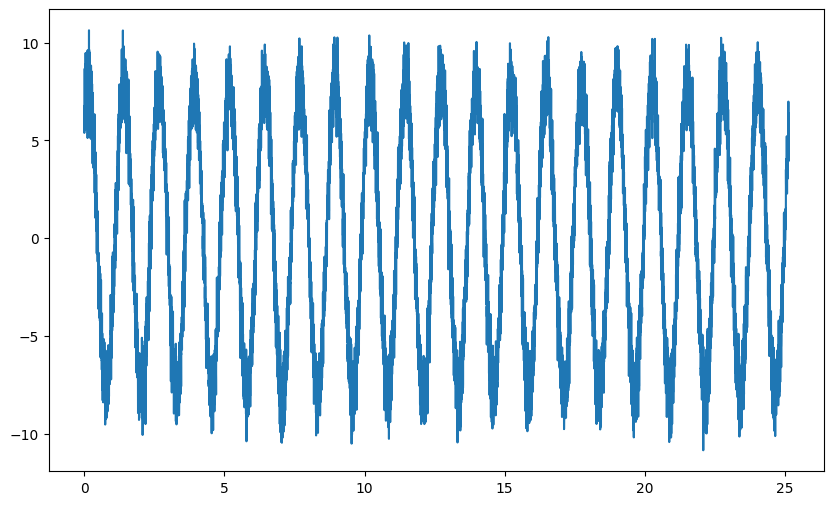

In [38]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(t, signal_noisy, label='Синусоида')

Амплитуда: 0.9999997380080544
Фаза: -0.7840915237832827 радиан


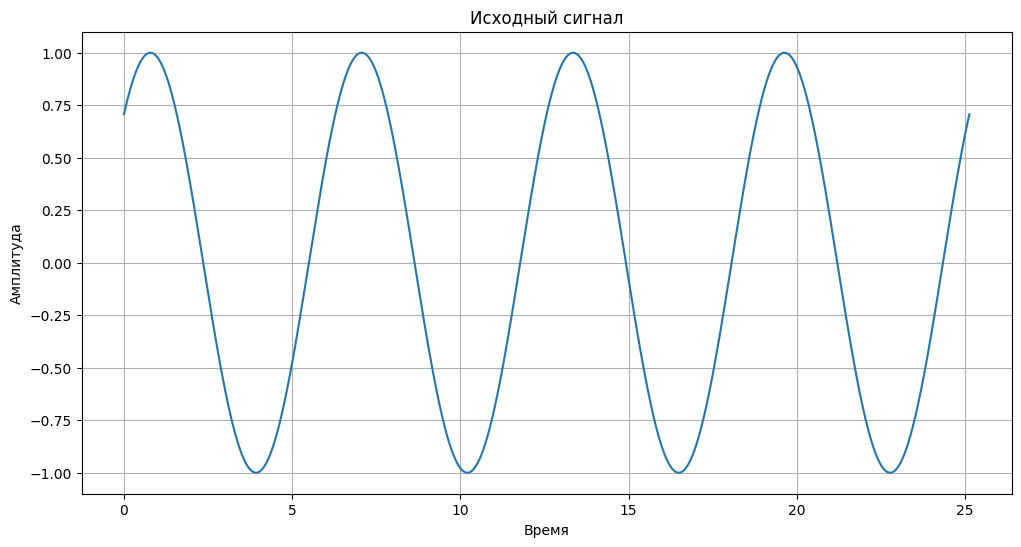

In [39]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.fft import fft, fftfreq

# Генерация тестового сигнала
# t = np.linspace(0, 1, 1000, endpoint=False)
# A = 2.5  # Амплитуда
# phi = np.pi/4  # Фаза
# f = 5  # Частота
# signal = A * np.sin(2 * np.pi * f * t + phi)

# Создаем массив значений времени
t = np.linspace(0, 8*np.pi, 10000)  # от 0 до 2π, 1000 точек

# Параметры синусоиды
amplitude = 1.0  # амплитуда
frequency = 1.0  # частота
phase = np.pi/4      # начальная фаза

# Генерируем синусоиду
y = amplitude * np.sin(frequency * t + phase)

noise = 0.1 * np.random.normal(0, 1, len(t))
y_noisy = y + noise

# Преобразование Фурье
yf = fft(y)
xf = fftfreq(len(t), t[24] - t[0])

# Находим максимальную амплитуду
max_freq_idx = np.argmax(np.abs(yf))
amplitude = 2/len(t) * np.abs(yf[max_freq_idx])
phase = np.angle(yf[max_freq_idx])

print(f"Амплитуда: {amplitude}")
print(f"Фаза: {phase} радиан")

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(t, y)
plt.title('Исходный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

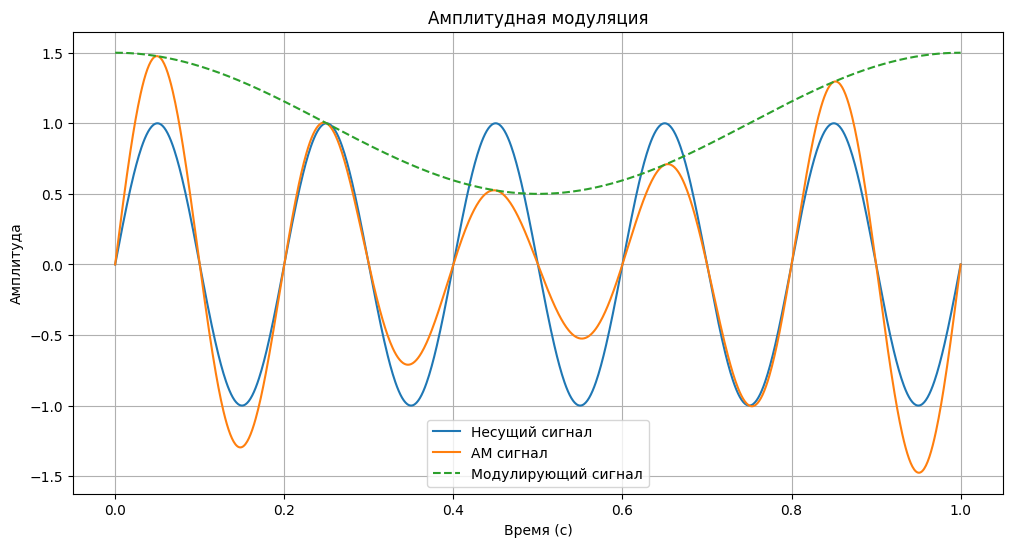

In [18]:
# Параметры несущего сигнала
t = np.linspace(0, 1, 1000)  # время
f_c = 5  # частота несущей
A_c = 1  # амплитуда несущей

# Модулирующий сигнал
f_m = 1  # частота модулирующего сигнала
A_m = 0.5  # амплитуда модулирующего сигнала

# Генерация сигналов
carrier = A_c * np.sin(2 * np.pi * f_c * t)
modulator = 1 + A_m * np.cos(2 * np.pi * f_m * t)  # модулирующий сигнал
am_signal = carrier * modulator  # АМ сигнал

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(t, carrier, label='Несущий сигнал')
plt.plot(t, am_signal, label='АМ сигнал')
plt.plot(t, modulator, label='Модулирующий сигнал', linestyle='--')
plt.legend()
plt.title('Амплитудная модуляция')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

Амплитуда: 2.5
Фаза: -0.7853981633974482 радиан


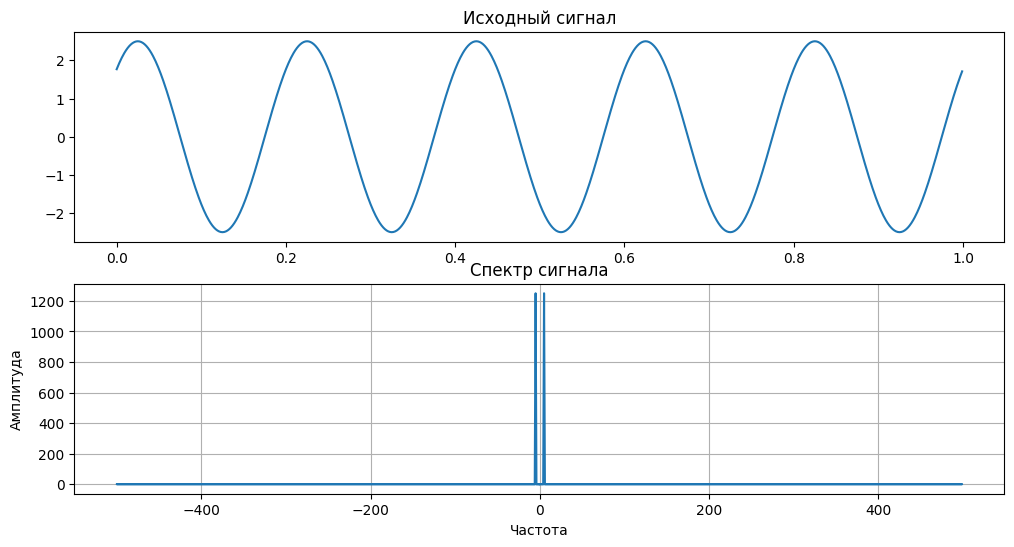

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Генерация тестового сигнала
t = np.linspace(0, 1, 1000, endpoint=False)  # 1 секунда, 1000 точек
A = 2.5  # Амплитуда
phi = np.pi/4  # Фаза
f = 5  # Частота
signal = A * np.sin(2 * np.pi * f * t + phi)

# Преобразование Фурье
yf = fft(signal)
xf = fftfreq(len(t), t[1] - t[0])

# Находим максимальную амплитуду
max_freq_idx = np.argmax(np.abs(yf))
amplitude = 2/len(t) * np.abs(yf[max_freq_idx])
phase = np.angle(yf[max_freq_idx])

print(f"Амплитуда: {amplitude}")
print(f"Фаза: {phase} радиан")

# Визуализация
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Исходный сигнал')

plt.subplot(2, 1, 2)
plt.plot(xf, np.abs(yf))
plt.title('Спектр сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()